In [1]:
import batman
import numpy as np
import matplotlib.pyplot as plt

In [2]:
params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 1.                      #orbital period
params.rp = 0.15                      #planet radius (in units of stellar radii)
params.a = 15.                       #semi-major axis (in units of stellar radii)
params.inc = 90.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)
params.u = [0.9, 0.1]                #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening model

In [3]:
t = np.linspace(-0.02, 0.02, 1000)

In [4]:
m = batman.TransitModel(params, t)    #initializes model
flux = m.light_curve(params)          #calculates light curve

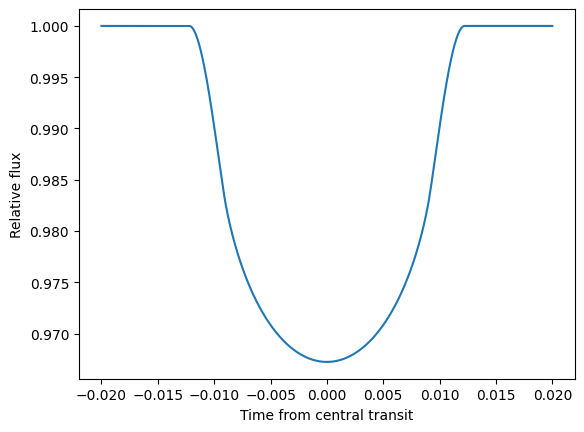

In [5]:
plt.plot(t, flux)
plt.xlabel("Time from central transit")
plt.ylabel("Relative flux")
plt.show()



In [6]:
import SOAP

In [7]:
sim = SOAP.Simulation()
sim.grid=801

In [8]:
print(sim.planet)
sim.planet.Mp=300

SOAP.Planet(P=4.0 d; t0=0.0 d; e=0.0; w=90.0 deg; ip=90.0 deg; lbda=0.0 deg; a=8.76 solRad, Rp=0.1 solRad)


In [9]:
print(sim.star)

SOAP.Star(prot=25.05 d; incl=90.0 deg; radius=1.0 solRad; teff=5778 K)


In [10]:
sim.planet.Rp=params.rp
sim.planet.a=params.a
sim.planet.P=params.per
sim.star.u1=params.u[0]
sim.star.u2=params.u[1]
sim.active_regions=[]

In [11]:
print(sim.planet)

SOAP.Planet(P=1.0 d; t0=0.0 d; e=0.0; w=90.0 deg; ip=90.0 deg; lbda=0.0 deg; a=15.0 solRad, Rp=0.15 solRad)


In [12]:
sim.star.prot=5

In [13]:
out=sim.calculate_signal(psi=t*sim.planet.P/sim.star.prot)


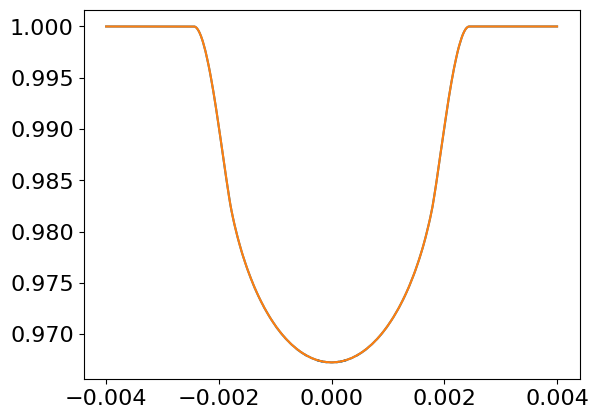

In [14]:
plt.plot(out.psi, out.flux)
plt.plot(out.psi, flux)

<Quantity -0.67780581>

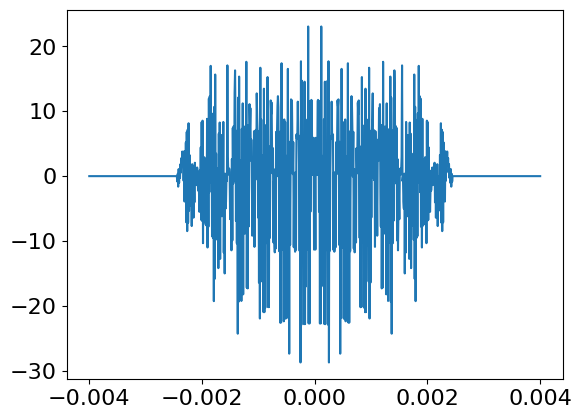

In [15]:
plt.plot(out.psi,(out.flux-flux)*1e6)

np.mean((out.flux-flux)*1e6)

0.024029537928860173 km / s


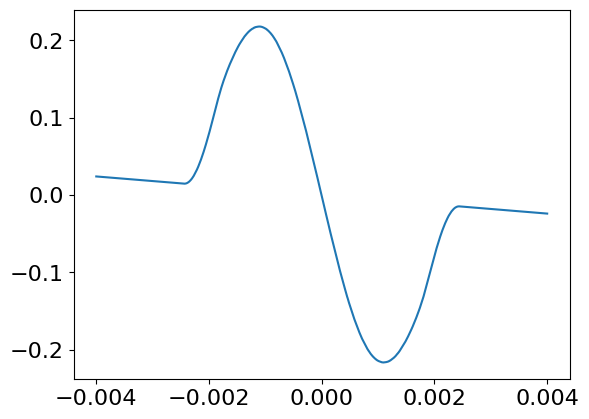

In [16]:
plt.plot(out.psi, out.rv)
print(out.rv[0])